#**Titanic Dataset**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [10]:
#read the dataset

df=pd.read_csv('/content/drive/MyDrive/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
#rows 418 and columns are 12

df.shape

(418, 12)

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [14]:
#checking null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In Age column 86 null values are present while in Fare and Cabin 1, 327

In [15]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df['Cabin'].fillna('Unknown',inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#**Exploratory Data Analysis**

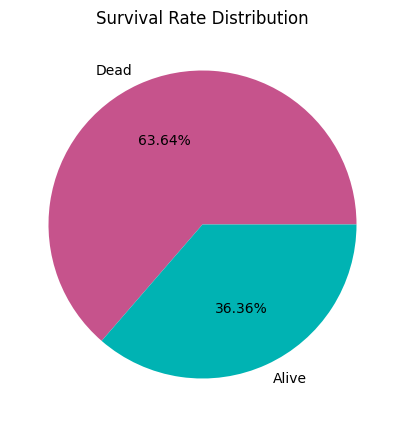

In [17]:
surv_rate=df['Survived'].value_counts().reset_index()
a=['Dead','Alive']
color=['#c6538c','#00b3b3']
plt.figure(figsize=(7,5))
plt.title("Survival Rate Distribution")
plt.pie(surv_rate['Survived'],labels=a,autopct='%1.2f%%',colors=color)
plt.show()

This graph shows that The total Death and Alive rate percent are 63.64 and 36.36 respectively

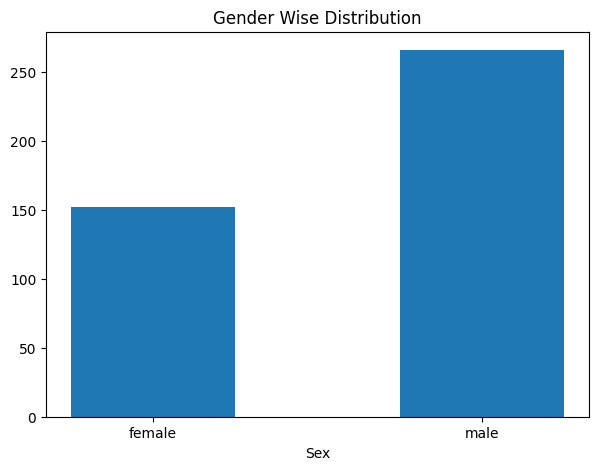

In [18]:
a=df.groupby(['Sex']).size().reset_index()
a.rename(columns={0:'Count'},inplace=True)
plt.figure(figsize=(7,5))
plt.bar(a['Sex'],a['Count'],width=0.5)
plt.title("Gender Wise Distribution")
plt.xlabel("Sex")
plt.show()

In this graph total females are present in titanic is 152 and males are 266

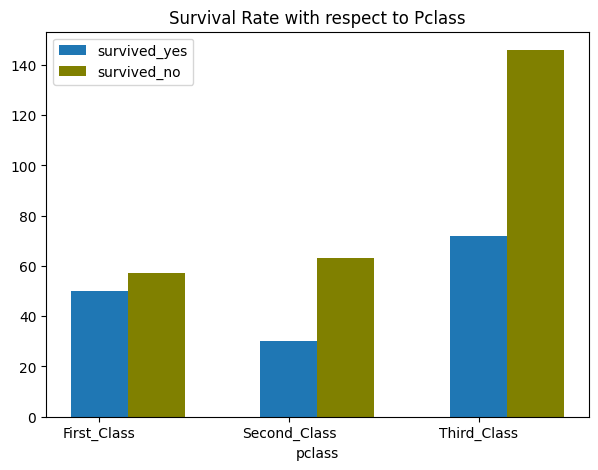

In [19]:
surv_pclass=df.groupby(['Survived','Pclass']).size().reset_index()
surv_pclass.rename(columns={0:'Count'},inplace=True)
surv_pclass_yes=surv_pclass[surv_pclass['Survived']==1]
surv_pclass_no=surv_pclass[surv_pclass['Survived']==0]
width=0.3
plt.figure(figsize=(7,5))
a=list(df['Pclass'].unique())
c=np.arange(len(a))
plt.xticks(c,['First_Class','Second_Class','Third_Class'])
plt.xlabel("pclass")
plt.title("Survival Rate with respect to Pclass")
plt.bar(c,surv_pclass_yes['Count'],label='survived_yes',width=width)
plt.bar(c+0.3,surv_pclass_no['Count'],label='survived_no',width=width,color='olive')
plt.legend()
plt.show()

This graph shows Third_class as more death and alive rate

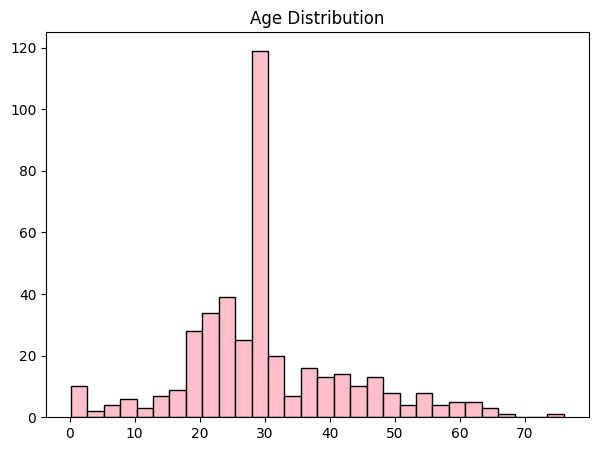

In [20]:
plt.figure(figsize=(7,5))
plt.hist(df['Age'],bins=30,edgecolor='black',color='pink')
plt.title("Age Distribution")
plt.show()

The most common age group is between 25 to 30

<Axes: title={'center': 'Death rate with respect to Gender'}, xlabel='Sex'>

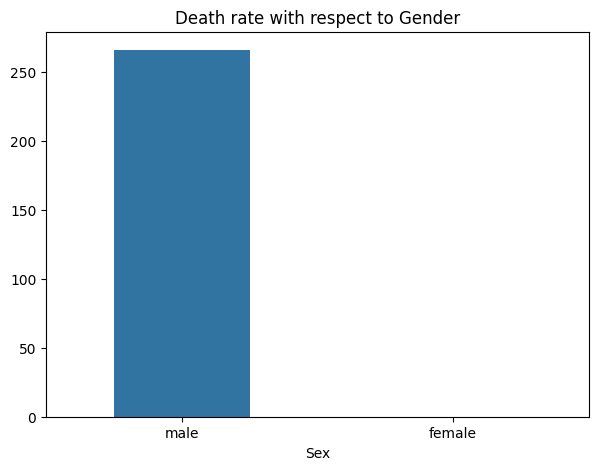

In [21]:
gender=df.groupby(['Sex','Survived']).size().reset_index()
death_female=df[(df['Sex']=="female") & (df['Survived']==0)]
death_female=len(death_female)
death_male=df[(df['Sex']=="male") & (df['Survived']==0)]
death_male=len(death_male)
plt.figure(figsize=(7,5))
plt.xlabel("Sex")
plt.title("Death rate with respect to Gender")
sns.barplot(x=['male','female'],y=[death_male,death_female],width=0.5)


The males are not survived but all females are survived

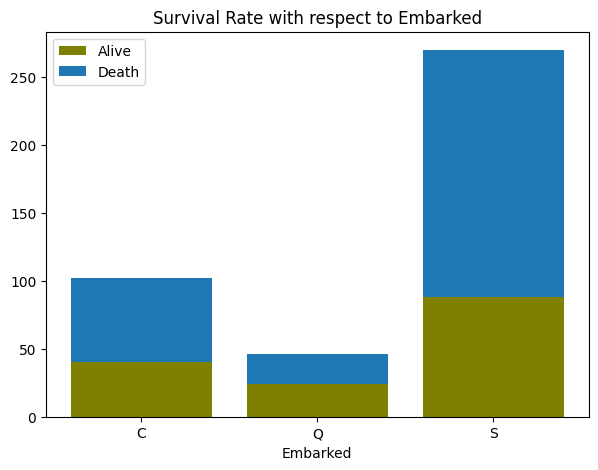

In [22]:
embark=df.groupby(['Embarked','Survived']).size().reset_index()
embark.rename(columns={0:'Count'},inplace=True)
embark_yes=embark[embark['Survived']==1]
embark_no=embark[embark['Survived']==0]
plt.figure(figsize=(7,5))
plt.xlabel("Embarked")
plt.title("Survival Rate with respect to Embarked")
plt.bar(embark_yes['Embarked'],embark_yes['Count'],label='Alive',color='olive')
plt.bar(embark_no['Embarked'],embark_no['Count'],bottom=embark_yes['Count'],label='Death')
plt.legend()
plt.show()

This graphs represents that the more people are dead from Southampton

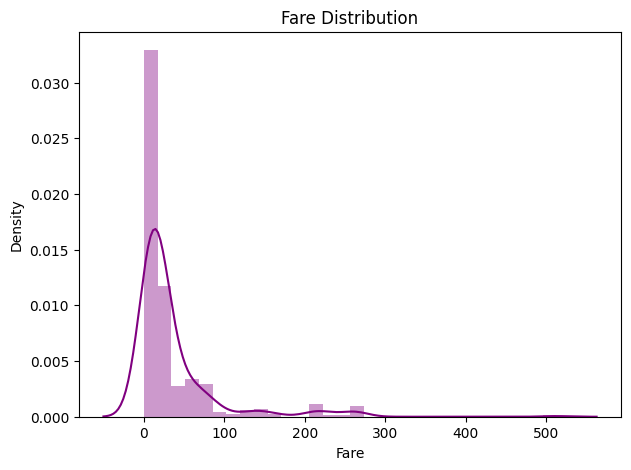

In [23]:
plt.figure(figsize=(7,5))
plt.title("Fare Distribution")
sns.distplot(df['Fare'],hist=True,bins=30,color='purple')
plt.show()

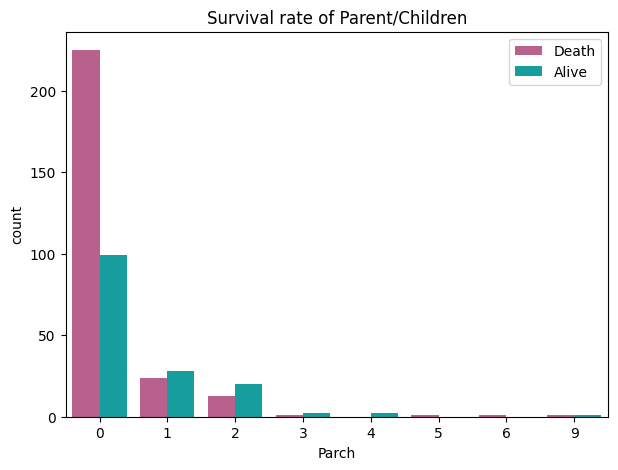

In [24]:
plt.figure(figsize=(7,5))
plt.title("Survival rate of Parent/Children")
color=['#c6538c','#00b3b3']
sns.countplot(data=df,x='Parch',hue='Survived',palette=color)
plt.legend(labels=['Death','Alive'])
plt.show()

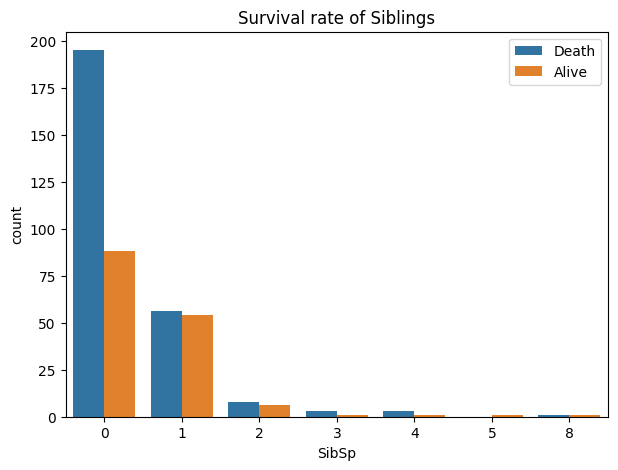

In [25]:
plt.figure(figsize=(7,5))
plt.title("Survival rate of Siblings")
sns.countplot(data=df,x='SibSp',hue='Survived')
plt.legend(labels=['Death','Alive'])
plt.show()

<Axes: title={'center': 'Correlation'}>

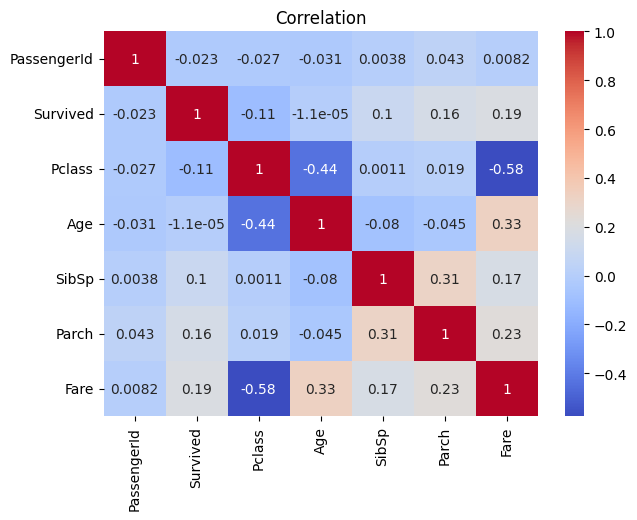

In [26]:
plt.figure(figsize=(7,5))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')